In [1]:
!pip install -q kagglehub scikit-learn pandas matplotlib

In [2]:
import kagglehub

# Download
path = kagglehub.dataset_download("greatgamedota/dfdc-part-34")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/dfdc-part-34


In [3]:
import pandas as pd
import os

metadata = pd.read_csv(f"{path}/images/metadata34.csv")

# .mp4 uzantısını kaldır
metadata["filename"] = metadata["filename"].str.replace(".mp4", "", regex=False)
metadata["original"] = metadata["original"].str.replace(".mp4", "", regex=False)

print(metadata.head())

     filename label  split    original
0  zhmjtavtpn  FAKE  train  ejnrxekehh
1  dazellwbsl  FAKE  train  xuxkfhqjiu
2  elwdztqnot  FAKE  train  xlyxbyhjsq
3  fiedwlcwyn  FAKE  train  skhnvzyukn
4  svbcewtjvh  FAKE  train  arrpqqfiah


In [4]:
from glob import glob

def get_image_paths(base_path, filename):
    folder = os.path.join(base_path, "images", filename)
    image_paths = sorted(glob(f"{folder}/*.jpg"), key=lambda x: int(os.path.basename(x).split(".")[0]))
    return image_paths

# Örnek olarak: bir klasördeki tüm frame'ler:
sample_images = get_image_paths(path, metadata["filename"].iloc[0])
print(sample_images)

['/kaggle/input/dfdc-part-34/images/zhmjtavtpn/0.jpg', '/kaggle/input/dfdc-part-34/images/zhmjtavtpn/30.jpg', '/kaggle/input/dfdc-part-34/images/zhmjtavtpn/60.jpg', '/kaggle/input/dfdc-part-34/images/zhmjtavtpn/90.jpg', '/kaggle/input/dfdc-part-34/images/zhmjtavtpn/120.jpg', '/kaggle/input/dfdc-part-34/images/zhmjtavtpn/150.jpg', '/kaggle/input/dfdc-part-34/images/zhmjtavtpn/180.jpg', '/kaggle/input/dfdc-part-34/images/zhmjtavtpn/210.jpg', '/kaggle/input/dfdc-part-34/images/zhmjtavtpn/240.jpg', '/kaggle/input/dfdc-part-34/images/zhmjtavtpn/270.jpg']


In [11]:
from collections import defaultdict

# Her REAL video için FAKE varyantlarını tutan bir dict
real_to_fakes = defaultdict(list)

for _, row in metadata.iterrows():
    if row['label'] == 'FAKE':
        real = row['original']
        fake = row['filename']
        real_to_fakes[real].append(fake)

# Kontrol
for real, fakes in list(real_to_fakes.items())[:5]:
    print(f"REAL: {real} → FAKEs: {fakes}")

REAL: ejnrxekehh → FAKEs: ['zhmjtavtpn', 'fkssfkbrkp', 'zaynuhjaci', 'etewvhbnzs', 'pccwidwbwh', 'awibecpxci', 'xjcoinhsdx']
REAL: xuxkfhqjiu → FAKEs: ['dazellwbsl', 'cwgnnijunv', 'qvedkofrey', 'gjthassixk', 'cbkqrlaiyi', 'ecdgxqhelh', 'bnsyxqrgae', 'jftrbnijmt', 'lavnzallny', 'wqsuimspwa', 'krnhpqtmiu', 'cxkymqpwuq', 'tpcflvfoqo', 'whrykekthg', 'cnrofrairp', 'nngphqdnot', 'vohguniokm', 'vrwpihsuwj', 'cwktquxciy', 'htvpaolyrq', 'sevcmzjyvo']
REAL: xlyxbyhjsq → FAKEs: ['elwdztqnot', 'ebxopxoftt', 'vxucpqtbuf', 'evkevitmfx', 'gahlzfbmst', 'xcrbcszeqb', 'qdpkezyqib', 'yhjlqgldfh', 'hdidvxfppi', 'fjnupufknt', 'jglrfawgpc', 'hqytjkkmus', 'agrqzohqhx', 'aajrzgorsm', 'lyffdrzfmv', 'nutillbije', 'sttoxniflx', 'hhcapkusnr', 'dctbnichwl', 'tgepzyrrkm', 'lkomcvfnsn', 'jytyijewbu']
REAL: skhnvzyukn → FAKEs: ['fiedwlcwyn', 'cazuqtjfrn', 'uagcrisovu', 'pfbicotttj', 'yqcfpwqlsl', 'mlhuxixymc', 'wtfxmkdcgn', 'enpdzuwrqu', 'zjijfdkjxm']
REAL: arrpqqfiah → FAKEs: ['svbcewtjvh', 'olleeauetp', 'jdhxlmqgij

In [14]:
rows = []

for real, fakes in real_to_fakes.items():
    for fake in fakes:
        rows.append({"real": real, "fake": fake})

real_fake_df = pd.DataFrame(rows)
print(real_fake_df.head())

         real        fake
0  ejnrxekehh  zhmjtavtpn
1  ejnrxekehh  fkssfkbrkp
2  ejnrxekehh  zaynuhjaci
3  ejnrxekehh  etewvhbnzs
4  ejnrxekehh  pccwidwbwh


In [19]:
# Tüm REAL dosya isimlerini küme halinde al (sadece label'ı REAL olanlar)
real_filenames = set(metadata[metadata['label'] == 'REAL']['filename'])

missing_originals = []

for _, row in metadata.iterrows():
    if row['label'] == 'FAKE' and row['original'] not in real_filenames:
        missing_originals.append((row['filename'], row['original']))

# Sonuç
if missing_originals:
    print(f"{len(missing_originals)} FAKE dosyasının orijinali eksik:")
    for fake, original in missing_originals[:10]:
        print(f"FAKE: {fake} → MISSING ORIGINAL: {original}")
else:
    print("Tüm FAKE dosyaların orijinalleri metadata içinde mevcut.")

Tüm FAKE dosyaların orijinalleri metadata içinde mevcut.


In [20]:
import pandas as pd
from collections import defaultdict

# REAL → FAKE eşleşmesi sözlüğü
real_to_fakes = defaultdict(list)

for _, row in metadata.iterrows():
    if row['label'] == 'FAKE':
        real = row['original']
        fake = row['filename']
        real_to_fakes[real].append(fake)

# FAKE sayısı DataFrame'i
real_fake_count = pd.DataFrame([
    {"real": real, "num_fakes": len(fakes)}
    for real, fakes in real_to_fakes.items()
])

# FAKE sayısına göre büyükten küçüğe sıralama
real_fake_count = real_fake_count.sort_values(by="num_fakes", ascending=False).reset_index(drop=True)

print(real_fake_count.head(1000))

           real  num_fakes
0    xlyxbyhjsq         22
1    xuxkfhqjiu         21
2    fxyzxptcwb         20
3    iaqtariies         20
4    uopfswyygk         20
..          ...        ...
411  pcbwggbzpc          1
412  pokpzfvuli          1
413  gxhmwktmgg          1
414  cigrglaemt          1
415  eirrhmppfo          1

[416 rows x 2 columns]


In [21]:
# preprocessing aşaması

import random
from tqdm import tqdm

frame_numbers = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270]
pair_rows = []
unused_fake_frames = []

# her real için eşleştiği fake klasörleri tut
for real, fakes in tqdm(real_to_fakes.items()):
    available_fakes = fakes.copy()
    used_fakes = set()

    for frame in frame_numbers:
        if len(available_fakes) == 0:
            # havuz boşsa resetle
            available_fakes = list(set(fakes) - used_fakes)
            used_fakes = set()

        if len(available_fakes) == 0:
            # hala boşsa, demek ki fakes çok azdı
            continue

        # random seç, seçileni kaldır ve işaretle
        selected_fake = random.choice(available_fakes)
        available_fakes.remove(selected_fake)
        used_fakes.add(selected_fake)

        pair_rows.append({
            "real_video": real,
            "real_frame": f"{frame}.jpg",
            "fake_video": selected_fake,
            "fake_frame": f"{frame}.jpg"
        })

# eşleşme tablosunu DataFrame'e dök
paired_df = pd.DataFrame(pair_rows)

# şimdi eşleşmeyen dataframeler
all_fake_frames = set()
used_fake_frames = set()

for fake_list in real_to_fakes.values():
    for fake in fake_list:
        for frame in frame_numbers:
            all_fake_frames.add((fake, f"{frame}.jpg"))

for _, row in paired_df.iterrows():
    used_fake_frames.add((row['fake_video'], row['fake_frame']))

unused = all_fake_frames - used_fake_frames

unused_fake_frames_df = pd.DataFrame(list(unused), columns=["fake_video", "fake_frame"])

# Sonuçlar:
print("Eşleşmiş frame çifti sayısı:", len(paired_df))
print("Hiç kullanılmamış fake frame sayısı:", len(unused_fake_frames_df))

100%|██████████| 416/416 [00:00<00:00, 57265.76it/s]

Eşleşmiş frame çifti sayısı: 3392
Hiç kullanılmamış fake frame sayısı: 19028


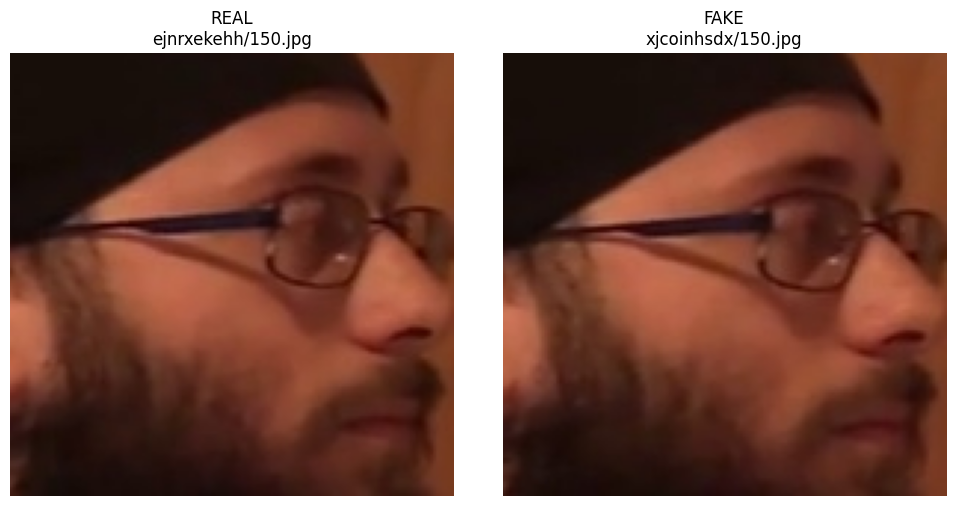

In [24]:
import matplotlib.pyplot as plt
import cv2
def show_frame_pair(base_path, real_video, real_frame, fake_video, fake_frame):
    real_path = os.path.join(base_path, "images", real_video, real_frame)
    fake_path = os.path.join(base_path, "images", fake_video, fake_frame)

    real_img = cv2.imread(real_path)
    fake_img = cv2.imread(fake_path)

    if real_img is None or fake_img is None:
        print("Görsellerden biri yüklenemedi.")
        return

    # BGR → RGB
    real_img = cv2.cvtColor(real_img, cv2.COLOR_BGR2RGB)
    fake_img = cv2.cvtColor(fake_img, cv2.COLOR_BGR2RGB)

    # Görüntüle
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(real_img)
    plt.title(f"REAL\n{real_video}/{real_frame}")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(fake_img)
    plt.title(f"FAKE\n{fake_video}/{fake_frame}")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# Örnek bir satırı seç (örneğin 5. satır)
example = paired_df.iloc[5]

show_frame_pair(
    base_path=path,
    real_video=example["real_video"],
    real_frame=example["real_frame"],
    fake_video=example["fake_video"],
    fake_frame=example["fake_frame"]
)


In [26]:
unused_fake_frames_df

,fake_video,fake_frame
0,yuhvpeibmt,210.jpg
1,leyikhjkdl,270.jpg
2,mzqegfmtlc,150.jpg
3,xmjrjpauyh,210.jpg
4,gpsqoaxgnc,270.jpg
...,...,...
19023,mwqpsyyiqe,270.jpg
19024,lomhyblssm,180.jpg
19025,tpltdeedfr,240.jpg
19026,rheivndyri,270.jpg


In [25]:
paired_df

,real_video,real_frame,fake_video,fake_frame
0,ejnrxekehh,0.jpg,etewvhbnzs,0.jpg
1,ejnrxekehh,30.jpg,zhmjtavtpn,30.jpg
2,ejnrxekehh,60.jpg,awibecpxci,60.jpg
3,ejnrxekehh,90.jpg,zaynuhjaci,90.jpg
4,ejnrxekehh,120.jpg,fkssfkbrkp,120.jpg
...,...,...,...,...
3387,dawmxkceki,90.jpg,amswidgjne,90.jpg
3388,dawmxkceki,120.jpg,iwzxyrgxxx,120.jpg
3389,dawmxkceki,180.jpg,iwzxyrgxxx,180.jpg
3390,dawmxkceki,210.jpg,amswidgjne,210.jpg


In [59]:
def load_image(base_path, video_folder, frame_file):
    path = os.path.join(base_path, "images", video_folder, frame_file)
    img = cv2.imread(path)
    if img is None:
        raise FileNotFoundError(f"{path} bulunamadı")
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    return img.astype(np.float32)
X = []
y = []

for _, row in paired_df.iterrows():
    try:
        # REAL örneği (label = 0)
        real_img = load_image(path, row['real_video'], row['real_frame'])
        X.append(real_img)
        y.append(0)

        # FAKE örneği (label = 1)
        fake_img = load_image(path, row['fake_video'], row['fake_frame'])
        X.append(fake_img)
        y.append(1)

    except Exception as e:
        print("Hata:", e)
        continue

X = np.array(X)
y = np.array(y)

print("Veri şekli:", X.shape, "Label şekli:", y.shape)


Veri şekli: (6784, 224, 224, 3) Label şekli: (6784,)


In [60]:
# eğitim için random bölme
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.21, stratify=y, random_state=63)

In [61]:
# EfficientNet Modeli ile Transfer Learning

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.metrics import AUC

base_model = EfficientNetB0(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
base_model.trainable = True

inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.4)(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[AUC(name="auc")]
)

In [62]:
# train etme

from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping: val_auc yükselmiyorsa 5 epoch sonra dur
early_stop = EarlyStopping(
    monitor='val_auc',
    patience=5,
    restore_best_weights=True,
    mode='max',
    verbose=1
)

# Eğitim
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 120s 283ms/step - auc: 0.7595 - loss: 0.5648 - val_auc: 0.4569 - val_loss: 0.6935
Epoch 2/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - auc: 0.9574 - loss: 0.2644 - val_auc: 0.4564 - val_loss: 0.7364
Epoch 3/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - auc: 0.9742 - loss: 0.1996 - val_auc: 0.5300 - val_loss: 0.6942
Epoch 4/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - auc: 0.9803 - loss: 0.1731 - val_auc: 0.4572 - val_loss: 0.7435
Epoch 5/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - auc: 0.9883 - loss: 0.1309 - val_auc: 0.4786 - val_loss: 11.2145
Epoch 6/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - auc: 0.9875 - loss: 0.1398 - val_auc: 0.5427 - val_loss: 0.7145
Epoch 7/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - auc: 0.9911 - loss: 0.1150 - val_auc: 0.5049 - val_loss: 724.9196
Epoch 8/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - auc: 0.9826 - loss: 0.1586 - val_auc: 0.5138 - val_loss: 18.3580
Epoch 9/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 7

In [63]:
# evaulation

import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 151ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       713
           1       0.00      0.00      0.00       712

    accuracy                           0.50      1425
   macro avg       0.25      0.50      0.33      1425
weighted avg       0.25      0.50      0.33      1425

AUC-ROC: 0.5742766755440692
Confusion Matrix:
 [[713   0]
 [712   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


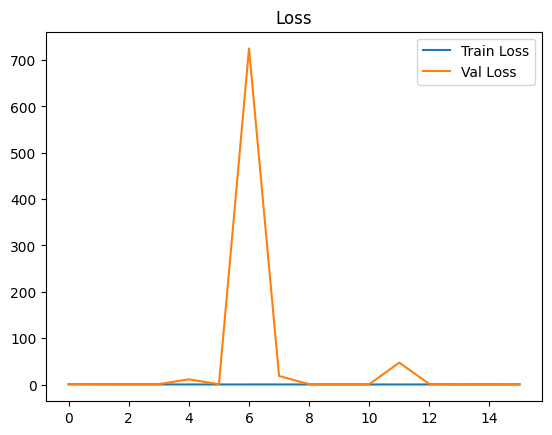

In [64]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()